# Reply on the feedback of Lab 4

For all typos on Lab 4 (e.g. 4.4 Q3): All fixed on the online version. 

# Context
A researcher enjoys drinking tea when trying to do brain-melting things like studying statistics. He feels that tea helps him think, and he wants to verify whether tea really improves cognitive function. The researcher recruits a large group of respondents and randomly assigns each one with a different number of cups of tea to drink every day [^1]. After one month, he measures the cognitive function score of each participant and saves the data in `tea.sav`.

[^1]: Oh wait, could this kind of torture be approved by the IRB? 

# Objectives
1. Write down the bivariate regression equation to be estimated. The goal is to study whether tea affects cognitive function.
2. Do you think the bivariate regression is a good choice for the data? Why or why not?
3. Conduct the bivariate regression analysis using the data. Interpret the intercept and the slope from the raw regression.
4. Interpret the slope from the standardized regression. From which regression (raw or standardized) is the slope easier to interpret and understand?
5. Predict the cognitive function score of a respondent who drinks 3 cups of tea per day. Do you think your prediction is accurate (close to the truth)?
6. Test the hypothesis that tea predicts cognitive function using the regression. Does your result imply any findings about the causal effect of tea on cognitive function?

# Solutions

## A peek on the dataset as always

In [1]:
import pandas as pd

tea = pd.read_spss('./datasets/tea.sav')
print(tea.describe())

              tea     cog_fun
count  716.000000  716.000000
mean     3.032123   50.611732
std      1.669245    9.882814
min      0.000000   24.000000
25%      2.000000   44.000000
50%      3.000000   51.000000
75%      4.000000   57.000000
max      8.000000   80.000000


## Q1: The bivariate regression equation

**Answer**

Given the independent variable $X$, the predicted $\hat Y_{cog\_fun}$ [^2] is: 

$$
\hat Y_{cog\_fun} = \beta_0 + \beta_1X
$$

[^2]: Add $\epsilon$ if consider the error term. 

## Q2: Whether bi-variate regression is a good choice for the data

**Answer** 

The bi-variate regression may not be a strong model for this data for:  

1. The Pearson's Correlation: The Pearson's correlation coefficient ($r \approx 0.0777$) indicates a relatively weak positive relationship between tea consumption and cognitive function. The $p$-value ($p \approx 0.0378$) is below 0.05, suggesting that the weak correlation is statistically significant. 

2. Linearity and Distribution: The scatter plot in @fig-scatter shows that a weak and flat linear relationship between tea consumption and cognitive function, which aligns with the low Pearson's $r$. While the histograms in @fig-histograms show that the cognitive function scores are approximately normally distributed.

3. However, the sample size ($N = 716$) is relatively large, which may be beneficial for conducting a regression.

Based on this weak linear trend, although bi-variate regression could be employed as they meet the assumption of a  linear regression, the model may not explain much variability in cognitive function. Other factors like age, education background even SES may (and must) influence cognitive function. For sake of this assignment, I will assume that other variables either do not vary significantly across participants or are not measured.

**Solution**

In [2]:
import scipy.stats as stats
tea_pearsonr, tea_pvalue = stats.pearsonr(tea.tea, tea.cog_fun)
print(f'Pearson\'s r: {tea_pearsonr}\n'
      f'p-value: {tea_pvalue}')

Pearson's r: 0.07765252417388956
p-value: 0.03776954868447832


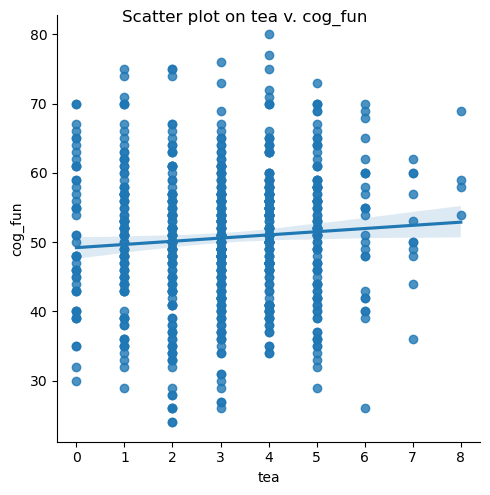

In [3]:
#| label: fig-scatter
#| fig-cap: Scatter Plot on tea v. cog_fun

import matplotlib.pyplot as plt
import seaborn as sns

tea_scatter = sns.lmplot(tea, x='tea', y='cog_fun')
tea_scatter.fig.suptitle('Scatter plot on tea v. cog_fun')
plt.show()

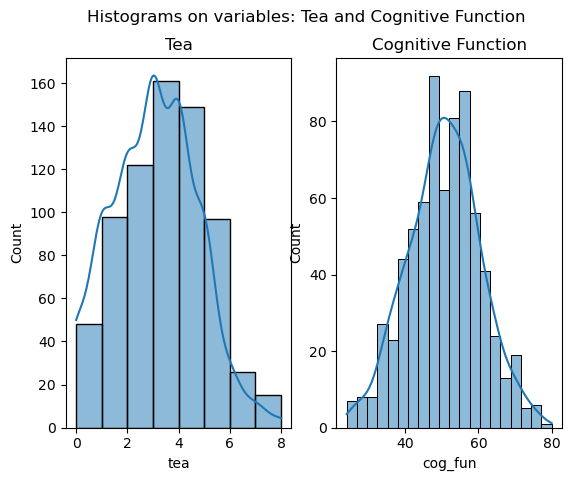

In [4]:
#| label: fig-histograms
#| fig-cap: Distribution of cups of tea and cognitive function scores

fig, ax =plt.subplots(1,2)
sns.histplot(tea, x='tea', kde=True, bins=8, ax=ax[0])
sns.histplot(tea, x='cog_fun', kde=True, ax=ax[1])
ax[0].set_title('Tea')
ax[1].set_title('Cognitive Function')
fig.suptitle('Histograms on variables: Tea and Cognitive Function')

plt.show()

## Q3: Bivariate regression analysis

**Answer**

Intercept: $\beta_0 \approx 49.2177$, suggests that when a respondent drinks 0 cups of tea per day, the expected cognitive function score is 49.2177.

Slope: $\beta_1 \approx 0.4597$, indicates a positive relationship between tea consumption and cognitive function. For each additional cup of tea consumed per day, the cognitive function score increases by approximately 0.4597 points.

**Solution**

In [5]:
def print_linregress(x, y): 
      b1, b0, r, p, stderr =  stats.linregress(x=x, y=y)
      print(f'Intercept: {b0}')
      print(f'Slope: {b1}')
      print(f'R-squared: {r**2}')
      print(f'P-value: {p}')
      print(f'Standard error: {stderr}')

print_linregress(tea['tea'], tea['cog_fun'])

Intercept: 49.217731459509174
Slope: 0.45974402348753085
R-squared: 0.006029914510576479
P-value: 0.03776954868447834
Standard error: 0.22090119534570854


In the world of python, `scipy.stats` works fine for applying basic linear models, **however**, `statsmodels` gives you this pretty damn cool all-in-one summary output as shown below: 

In [6]:
import statsmodels.api as sm

def bivariate_regression(x, y): 
    X = sm.add_constant(x)
    model = sm.OLS(y, X).fit()
    summary = model.summary()
    print(summary)
    return model

tea_model = bivariate_regression(tea['tea'], tea['cog_fun'])

                            OLS Regression Results                            
Dep. Variable:                cog_fun   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     4.331
Date:                Mon, 28 Oct 2024   Prob (F-statistic):             0.0378
Time:                        19:52:27   Log-Likelihood:                -2653.5
No. Observations:                 716   AIC:                             5311.
Df Residuals:                     714   BIC:                             5320.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         49.2177      0.764     64.382      0.0

## Q4: The slope from the standardized regression

**Answer**

**Q4a: Interpret the slope from the standardized regression.**

$$\beta^* \approx 0.07765$$

The standardized slope is approximately 0.07765, means that for every one standard deviation increase in tea consumption, the cognitive function score increases by 0.07765 standard deviations.


**Q4b: From which regression (raw or standardized) is the slope easier to interpret and understand?**

It depends. 

The raw slope is easy to interpret in the context of the actual units of measurement as it represents the change in the dependent variable (`cog_fun`) for a one-unit change in the independent variable (`tea`).

The standardized slope makes comparing effects across different variables or studies much easier as it tells us how many standard deviations the dependent variable changes for a one standard deviation change in the independent variable.

**Solution**

Both the independent (`tea`) and dependent variables (`cog_fun`) are transformed into z-scores, then: 

In [7]:
# Preparing standardized
tea['tea_std'] = tea['tea'].apply(lambda x: (x - tea['tea'].mean()) / tea['tea'].std())
tea['cog_fun_std'] = tea['cog_fun'].apply(lambda x: (x - tea['cog_fun'].mean()) / tea['cog_fun'].std())

# Intercept and slope of standardized regression
print_linregress(tea['tea_std'], tea['cog_fun_std'])

Intercept: -1.2880252063838454e-16
Slope: 0.07765252417388924
R-squared: 0.006029914510576491
P-value: 0.0377695486844781
Standard error: 0.03731105688226283


In [8]:
# And the pretty damn detailed OLS summary
bivariate_regression(tea['tea_std'], tea['cog_fun_std'])

                            OLS Regression Results                            
Dep. Variable:            cog_fun_std   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     4.331
Date:                Mon, 28 Oct 2024   Prob (F-statistic):             0.0378
Time:                        19:52:27   Log-Likelihood:                -1013.3
No. Observations:                 716   AIC:                             2031.
Df Residuals:                     714   BIC:                             2040.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.765e-17      0.037  -1.81e-15      1.0

## Q5: Cognitive function score if drink 3 cups of tea per day

**Answer**

Given $X = 3$, the cognitive function score for a respondent who drinks 3 cups of tea per day is: 

$$\hat Y = \beta_0 + \beta_1 \times 3 \approx 50.5970$$

However, the prediction might not be very close to the true score. Although the slope is statistically significant (with a $p$-value of $p = 0.038$), the low $R$-squared ($R^2 \approx 0.006$) indicates that statistically, there's only 0.6% of the variance in cognitive function scores is explained by tea consumption. 

**Solution**

In [9]:
cog_fun_after_3_cups = tea_model.predict([1.0, 3]) # The 1.0 here is the constant required by statsmodels
print(f'Cognitive function score if drink 3 cups of tea per day: \n'
      f'{cog_fun_after_3_cups[0]}')

Cognitive function score if drink 3 cups of tea per day: 
50.59696352997175


## Q6: Tea predicts cognitive function? 

**Answers**

The $p$-value for the slope is: 

$$p \approx 0.0378$$

Since the $p$-value is less than 0.05 ($p < 0.05$), we can reject the null hypothesis ($H_0$). This suggests that there is evidence of an association between tea consumption and cognitive function scores.

However, the low $R$-squared value ($R^2 \approx 0.006$) indicates that tea consumption explains only a tiny fraction of the variability in cognitive function.

While the results suggest a statistically significant but weak association between tea consumption and cognitive function, they do not provide evidence of a causal effect. Besides, if simply drinking more tea could raise cognitive scores, we might think about advising children to drink tea to guarantee a bright future! That said, those less inclined to drink tea might still end up in schools of education.

**Solution**

Hypothesis: 

$H_0$: The slope ($\beta_1$) is zero, meaning tea consumption does not predict cognitive function.  
$H_1$: The slope ($\beta_1$) is not zero, meaning tea consumption does predict cognitive function.



In [10]:
tea_p_value = tea_model.pvalues['tea']

def test_hypothesis(p_value, alpha=0.05): 
    print(f'Given the p-value={p_value} and alpha={alpha}:')
    if p_value < alpha:
        print("Reject the null hypothesis.")
    else:
        print("Fail to reject the null hypothesis.")

test_hypothesis(tea_p_value, alpha=0.05)

Given the p-value=0.03776954868447742 and alpha=0.05:
Reject the null hypothesis.
